# Regression

## Linear Data

## Non-Linear Data

### Polynomial Regression

- transfer the X data: Treat the n-degree (n >1), as a new feature

- fit the transferred data in the linear regression. 

In [3]:
import numpy as np

# Data Creation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print (lin_reg.intercept_, lin_reg.coef_)

[ 1.80301482] [[ 1.03065642  0.57175762]]


## Regularized Linear Models

### Ridge Regression

In [29]:
import numpy as np

# Data Creation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.linear_model import Ridge, SGDRegressor

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
print (ridge_reg.predict([[1.5]]))

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

[[ 5.49991088]]


array([ 5.47316824])

## Evaluation

### Learning Curve

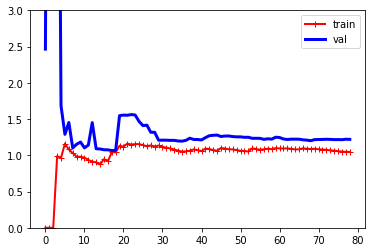

In [25]:
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y): 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = .2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)): 
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')
    plt.ylim(0, 3)
    plt.legend()


import numpy as np
import matplotlib.pyplot as plt

# Data Creation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = .5 * X ** 2 + X + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# # non-pipeline version 
# poly_features = PolynomialFeatures(degree = 10, include_bias = False)
# X_poly = poly_features.fit_transform(X)
# lin_reg = LinearRegression()
# plot_learning_curves(lin_reg, X, y)

# pipeline version
# Note: Need to limit the y axis min and max range
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree = 2, include_bias = False)), 
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)




# Classification

## Logistic Regression 

### with one feature and plot

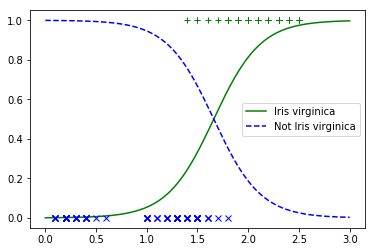

In [28]:
%matplotlib inline
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X[y == 1], y[y==1], 'g+')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris virginica')
plt.plot(X[y == 0], y[y==0], 'bx')
plt.legend()

### with two features and plot

(0, 3)

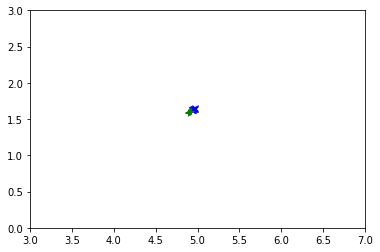

In [51]:
%matplotlib inline
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris['data'][:, 2:]
y = (iris['target'] == 2).astype(np.int)

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new_w = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new_l = np.linspace(2.5, 7, 1000).reshape(-1, 1)
X_new = np.c_[X_new_l, X_new_w]
y_proba = log_reg.predict_proba(X_new)

y_pred = y_proba.argmax(axis = 1)

y_decide = y_proba[:, 1] - y_proba[:, 0]
y_sim_p = (y_decide < .1) & (y_decide > 0)
y_sim_n = (y_decide > -.1) & (y_decide < 0)


plt.plot(X_new_l[y_sim_p], X_new_w[y_sim_p], 'bx')
plt.plot(X_new_l[y_sim_n], X_new_w[y_sim_n], 'g+')
plt.xlim(3, 7)
plt.ylim(0, 3)
# plt.legend()

## Decision Trees

In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

export_graphviz(
    tree_clf, 
    out_file = image_path('iris_tree.dot'), 
    feature_names = iris.feature_names[2:], 
    class_names = iris.target_names, 
    rounded = True, 
    filled = True
)

dot -Tpng iris_dree.dot -o iris_tree.png

SyntaxError: invalid syntax (<ipython-input-55-d185f7d1a9c5>, line 20)

In [56]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

dot -Tpng iris_dree.dot -o iris_tree.png

SyntaxError: invalid syntax (<ipython-input-56-304b87a17c74>, line 32)